In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.tail() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


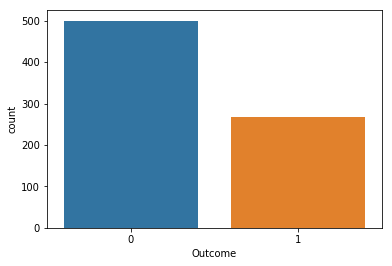

In [0]:
sns.countplot(diabetes['Outcome'], label='Count')

In [0]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###Phân tích - tiền xử lý dữ liệu

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

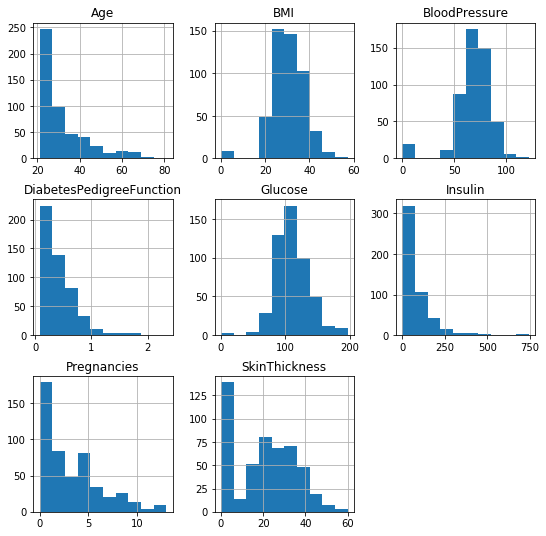

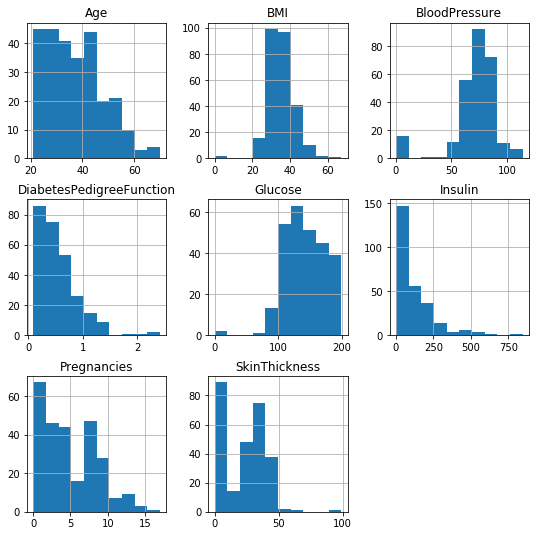

In [0]:
diabetes.groupby('Outcome').hist(figsize=(9, 9))

####Tại sao BMI, Blood Pressure, DiabetesPedigreeFunction, Glucose, Insulin, Skin Thickness có giá trị 0?



*   Blood pressure, Glucose huyết tương lúc đối, và Insulin của người bình thường không thể mang giá trị 0
*   BMI được tính bằng weight / (height * height) cũng không thể mang giá trị 0
*   Skin Thickness của người bình thường là 2.5mm (men) hoặc 18.0mm (women) không thể có giá trị 0

In [0]:
print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])

Total :  35


####Có nên lấy mean cho giá trị blood pressure hay loại bỏ luôn feature này? 
Giá trị này rất quan trọng trong việc chẩn đoán bệnh nhân tiểu đường sử dụng giá trị thiếu chính xác có thể đẫn đén việc chuẩn đoán sai.

In [0]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes.shape, diabetes_mod.shape)

(768, 9) (724, 9)


#### Có nên loại bỏ các feature có nhiều missing value như SkinThickness và Insulin?
Có khá nhiều missing value của SkinThickness và Insulin nhưng chưa thể biết được việc loại bỏ các giá trị này là ảnh hưởng tốt hay xấu tới model 

=> Phải kiểm chứng qua thực nghiệm

In [0]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome, random_state=1995)

###K-Neighbors classify

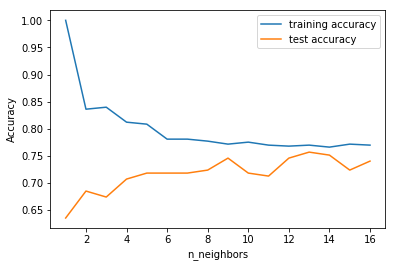

In [0]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 17)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [0]:
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.74


###Feature engineering

####Tìm các important features

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.786
Accuracy on test set: 0.751


In [0]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.68230495 0.         0.         0.         0.23051405
 0.         0.087181  ]


In [0]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

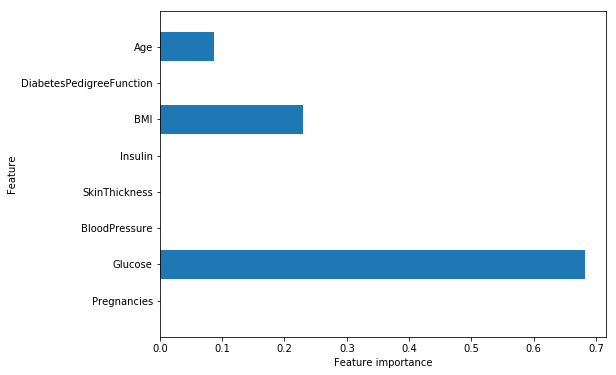

In [0]:
plot_feature_importances_diabetes(tree)

Feature Glucose quan trọng nhất trong bộ dữ liệu khi chạy Decision Tree

In [0]:
rf = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.801
Accuracy on test set: 0.740


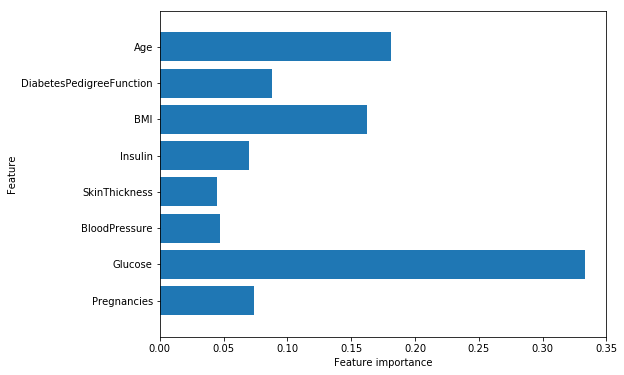

In [0]:
plot_feature_importances_diabetes(rf)

####thử chỉ xử dụng các features quan trọng Age, Pregnancies, Diabetes Pedigree Function, BMI, Glucose

In [0]:
extract_features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Pregnancies']
X_extract = diabetes_mod[extract_features]
y_extract = diabetes_mod.Outcome
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_extract, y_extract, stratify = diabetes_mod.Outcome, random_state=1995)

In [0]:
rf_e = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf_e.fit(X_train_e, y_train_e)
print("Accuracy on training set: {:.3f}".format(rf_e.score(X_train_e, y_train_e)))
print("Accuracy on test set: {:.3f}".format(rf_e.score(X_test_e, y_test_e)))

Accuracy on training set: 0.805
Accuracy on test set: 0.773


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [0]:
kfold = KFold(n_splits=10, random_state=10) 
score = cross_val_score(rf_e, X_extract, y_extract, cv=kfold, scoring='accuracy').mean()
print("Accuracy with extracted features data: {:.3f}".format(score))

Accuracy with extracted features data: 0.774


In [0]:
score = cross_val_score(rf, X, y, cv=kfold, scoring='accuracy').mean()
print("Accuracy with full data: {:.3f}".format(score))

Accuracy with full data: 0.759
